This is a notebook showing how the final data used for data analysis and hypothesis testing is build from all the available data files stored in eye_data and input_data respectively.

In [1]:
import os
import math
import numpy as np
import pandas as pd
from ast import literal_eval
import itertools
import arviz as az
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as  mpatches
pd.options.mode.chained_assignment = None  # default='warn'

from helper_functions import *

agent_center_x = 972
agent_center_y = 288

In [9]:
example = pre_process_eye_data(pd.read_csv(("../../../../Volumes/KMODyS_1/Data Moonlander III/AU25IL/eye_data/AU25IL_eye_tracking_output_1_0.0_15.csv"), index_col=False))
example

,time_tag,TimeTag,LeftEyeX,LeftEyeY,LeftPupilDiameter,RightEyeX,RightEyeY,RightPupilDiameter,DigitalIn,LeftBlink,...,distance_to_spaceship_in_pixel,distance_to_spaceship,distant_fixation,Saccade,saccadeOnset,N_saccade,saccade_direction_x,saccade_direction_y,saccade_amplitude_in_pixel,saccade_amplitude
0,0.0000,1540.3095,NaN,NaN,9999.0,-496.542694,-278.716827,80.042969,16777215.0,1.0,...,NaN,NaN,0,0.0,0,NaN,NaN,NaN,NaN,NaN
1,0.0005,1540.3100,NaN,NaN,9999.0,-489.150726,-278.826385,79.917969,16777215.0,1.0,...,NaN,NaN,0,0.0,0,NaN,NaN,NaN,NaN,NaN
2,0.0010,1540.3105,NaN,NaN,9999.0,-485.297089,-278.973694,79.933594,16777215.0,1.0,...,NaN,NaN,0,0.0,0,NaN,NaN,NaN,NaN,NaN
3,0.0015,1540.3110,NaN,NaN,9999.0,-481.454651,-279.178192,79.949219,16777215.0,1.0,...,NaN,NaN,0,0.0,0,NaN,NaN,NaN,NaN,NaN
4,0.0020,1540.3115,NaN,NaN,9999.0,-478.227936,-279.218628,79.988281,16777215.0,1.0,...,NaN,NaN,0,0.0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87011,43.5055,1583.8150,NaN,NaN,9999.0,NaN,NaN,9999.000000,16777215.0,1.0,...,NaN,NaN,0,0.0,0,NaN,NaN,NaN,NaN,NaN
87012,43.5060,1583.8155,NaN,NaN,9999.0,NaN,NaN,9999.000000,16777215.0,1.0,...,NaN,NaN,0,0.0,0,NaN,NaN,NaN,NaN,NaN
87013,43.5065,1583.8160,NaN,NaN,9999.0,NaN,NaN,9999.000000,16777215.0,1.0,...,NaN,NaN,0,0.0,0,NaN,NaN,NaN,NaN,NaN
87014,43.5070,1583.8165,NaN,NaN,9999.0,NaN,NaN,9999.000000,16777215.0,1.0,...,NaN,NaN,0,0.0,0,NaN,NaN,NaN,NaN,NaN


In [26]:
#root_dir = os.getcwd()

data_dir = "../../../../Volumes/KMODyS_1/Data Moonlander III/"

target_string = "output"
target_string_eye_tracking = "eye_tracking"

runs = []

for subdir, dirs, files in os.walk(data_dir):
    for file in files:
        if target_string_eye_tracking in file:
            runs.append(file)

# all data files have in their names a triplet for identification...       
# triplet coding: level, drift (True vs. False), input noise (None vs. Weak vs. Strong)

In [27]:
runs.remove('._AU25IL_eye_tracking_output_3_1.5_22.csv')  # don't know what that is
runs

['AU25IL_eye_tracking_output_1_0.0_15.csv',
 'AU25IL_eye_tracking_output_1_0.5_31.csv',
 'AU25IL_eye_tracking_output_1_1.0_44.csv',
 'AU25IL_eye_tracking_output_1_1.5_34.csv',
 'AU25IL_eye_tracking_output_1_2.0_27.csv',
 'AU25IL_eye_tracking_output_1_2.0_38.csv',
 'AU25IL_eye_tracking_output_2_0.0_13.csv',
 'AU25IL_eye_tracking_output_2_0.5_04.csv',
 'AU25IL_eye_tracking_output_2_1.0_18.csv',
 'AU25IL_eye_tracking_output_2_1.5_08.csv',
 'AU25IL_eye_tracking_output_2_2.0_12.csv',
 'AU25IL_eye_tracking_output_2_2.0_14.csv',
 'AU25IL_eye_tracking_output_2_2.0_19.csv',
 'AU25IL_eye_tracking_output_3_0.0_29.csv',
 'AU25IL_eye_tracking_output_3_0.5_24.csv',
 'AU25IL_eye_tracking_output_3_1.0_20.csv',
 'AU25IL_eye_tracking_output_3_1.5_16.csv',
 'AU25IL_eye_tracking_output_3_1.5_22.csv',
 'AU25IL_eye_tracking_output_3_2.0_03.csv',
 'AU25IL_eye_tracking_output_3_2.0_07.csv',
 'AU25IL_eye_tracking_output_3_2.0_33.csv',
 'AU25IL_eye_tracking_output_4_0.0_25.csv',
 'AU25IL_eye_tracking_output_4_0

### finding dubious data

one trial of ID IT02AH shouldn't have any input. It is a trial in which the monitor malfunctioned. We're going to exclude that one.

In [58]:
data_dir = "../../../../Volumes/KMODyS_1/Data Moonlander III/IT02AH/data/"

for subdir, dirs, files in os.walk(data_dir):
    for file in files:
        tmp_data = pre_process_input_data(pd.read_csv((f"{data_dir}{file}"), index_col=False))
                
        if 1 not in np.unique(tmp_data.start_input):
            print(file)


IT02AH_output_3_2.0_00.csv


In [60]:
runs.remove('IT02AH_eye_tracking_output_3_2.0_00.csv')
runs

['AU25IL_eye_tracking_output_1_0.0_15.csv',
 'AU25IL_eye_tracking_output_1_0.5_31.csv',
 'AU25IL_eye_tracking_output_1_1.0_44.csv',
 'AU25IL_eye_tracking_output_1_1.5_34.csv',
 'AU25IL_eye_tracking_output_1_2.0_27.csv',
 'AU25IL_eye_tracking_output_1_2.0_38.csv',
 'AU25IL_eye_tracking_output_2_0.0_13.csv',
 'AU25IL_eye_tracking_output_2_0.5_04.csv',
 'AU25IL_eye_tracking_output_2_1.0_18.csv',
 'AU25IL_eye_tracking_output_2_1.5_08.csv',
 'AU25IL_eye_tracking_output_2_2.0_12.csv',
 'AU25IL_eye_tracking_output_2_2.0_14.csv',
 'AU25IL_eye_tracking_output_2_2.0_19.csv',
 'AU25IL_eye_tracking_output_3_0.0_29.csv',
 'AU25IL_eye_tracking_output_3_0.5_24.csv',
 'AU25IL_eye_tracking_output_3_1.0_20.csv',
 'AU25IL_eye_tracking_output_3_1.5_16.csv',
 'AU25IL_eye_tracking_output_3_1.5_22.csv',
 'AU25IL_eye_tracking_output_3_2.0_03.csv',
 'AU25IL_eye_tracking_output_3_2.0_07.csv',
 'AU25IL_eye_tracking_output_3_2.0_33.csv',
 'AU25IL_eye_tracking_output_4_0.0_25.csv',
 'AU25IL_eye_tracking_output_4_0

## Building eye-movement dataframe

In [77]:
# filter the content for trials in snippets df
eye_data_complete = pd.DataFrame()

# slow but explicit for-loop...
for run in runs:
    
    tmp = run.split('_')
    id_code = tmp[0]
    level = int(tmp[4])
    input_noise = tmp[5]
    exp_trial = tmp[-1][:2]
    
    tmp_data = pre_process_eye_data(pd.read_csv((f"../../../../Volumes/KMODyS_1/Data Moonlander III/{id_code}/eye_data/{run}"), index_col=False))

    tmp_data["ID"] = id_code
    tmp_data["level"] = level
    tmp_data["input_noise"] = input_noise
    tmp_data["trial"] = exp_trial

    eye_data_complete = pd.concat([eye_data_complete, tmp_data])

18646221 rows of data generated for final data set.

In [52]:
def func(x):
    if x == 1:
        return "medium"
    elif x == 2:
        return "medium"
    elif x == 3:
        return "medium"
    elif x == 4:
        return "hard"
    elif x == 5:
        return "hard"
    elif x == 6:
        return "hard"
    else:
        return 'N/A'

#eye_data_complete["level_difficulty"] = eye_data_complete.level.apply(func)

# Calling func for the sub data frames for fixations and saccades individually is more efficient (less time consuming).

### Extracting fixations

In [79]:
fix_data = eye_data_complete[eye_data_complete.fixationOnset == 1].reset_index()
len(fix_data)

31522

In [80]:
N_visible_obs_col = []
Dist_to_closest_obstacle_col = []

for index, row in fix_data.iterrows():
    
    input_file_name = f'{row.ID}_output_{row.level}_{str(row.input_noise)}_{row.trial}.csv'
    
    path = f'../../../../Volumes/KMODyS_1/Data Moonlander III/{id_code}/data/'
    
    file_found = False
    
    for subdir, dirs, files in os.walk(path):
        for data_file in files:
            if input_file_name in str(data_file):
                
                file_found = True
                
                #print(f'searching for {data_file}')
                
                input_data = pre_process_input_data(pd.read_csv(f'{path}/{data_file}', index_col=False))
                
                closest_frame = input_data.iloc[(input_data['time_played'] - row.time_tag).abs().argsort()[0]]
                
                distances = []
                for obstacle in closest_frame.visible_obstacles:
                    dist_squared = np.power(np.abs(obstacle[0] - agent_center_x), 2) + np.power(np.abs(obstacle[1] - agent_center_y), 2)
                    distances.append(np.sqrt(dist_squared))
                
                if len(distances) > 0:
                    Dist_to_closest_obstacle = np.min(distances)
                elif len(distances) == 0:
                    Dist_to_closest_obstacle = np.nan
                    
                N_visible_obstacles = len(closest_frame.visible_obstacles)
                
                N_visible_obs_col.append(N_visible_obstacles)
                Dist_to_closest_obstacle_col.append(Dist_to_closest_obstacle)
    
    if not file_found:
        N_visible_obs_col.append(np.nan)
        Dist_to_closest_obstacle_col.append(np.nan)

In [81]:
fix_data.insert (41, 'N_visible_obstacles', N_visible_obs_col)
fix_data.insert (41, 'Dist_to_closest_obstacles_in_pixel', Dist_to_closest_obstacle_col)

fix_data['Dist_to_closest_obstacles'] = fix_data.apply(lambda row: pixel_to_degree(row.Dist_to_closest_obstacles_in_pixel), axis=1)

In [82]:
fix_data = fix_data.astype({'level':'int'})

fix_data["level_difficulty"] = fix_data.level.apply(func)

In [83]:
# drop unnecessary columns for fixation data
fix_data = fix_data.drop(labels=["saccade_amplitude", "saccade_amplitude_in_pixel", "saccade_direction_y", "saccade_direction_x", "saccadeOnset", "N_saccade", "Saccade"], axis = 1)

fix_data.to_csv('fixations_moonlander_iii.csv', sep=',')

## Building SoC data

In [43]:
data_dir = "../../../../Volumes/KMODyS_1/Data Moonlander III/"

output_string = "output"

eye_string = "eye_tracking"
training_string = "training"


runs = []

for subdir, dirs, files in os.walk(data_dir):
    for file in files:
        # potentially only going for crashed or done data
        if eye_string not in file and training_string not in file and output_string in file:
            runs.append(file)

In [45]:
runs.remove('._AU25IL_output_1_0.5_31.csv') # don't know what that is
runs

['AU25IL_output_1_0.0_15.csv',
 'AU25IL_output_1_0.5_31.csv',
 'AU25IL_output_1_1.0_44.csv',
 'AU25IL_output_1_1.5_34.csv',
 'AU25IL_output_1_2.0_27.csv',
 'AU25IL_output_1_2.0_38.csv',
 'AU25IL_output_2_0.0_13.csv',
 'AU25IL_output_2_0.5_04.csv',
 'AU25IL_output_2_1.0_18.csv',
 'AU25IL_output_2_1.5_08.csv',
 'AU25IL_output_2_2.0_12.csv',
 'AU25IL_output_2_2.0_14.csv',
 'AU25IL_output_2_2.0_19.csv',
 'AU25IL_output_3_0.0_29.csv',
 'AU25IL_output_3_0.5_24.csv',
 'AU25IL_output_3_1.0_20.csv',
 'AU25IL_output_3_1.5_16.csv',
 'AU25IL_output_3_1.5_22.csv',
 'AU25IL_output_3_2.0_03.csv',
 'AU25IL_output_3_2.0_07.csv',
 'AU25IL_output_3_2.0_33.csv',
 'AU25IL_output_4_0.0_25.csv',
 'AU25IL_output_4_0.5_10.csv',
 'AU25IL_output_4_0.5_32.csv',
 'AU25IL_output_4_0.5_35.csv',
 'AU25IL_output_4_1.0_23.csv',
 'AU25IL_output_4_1.5_05.csv',
 'AU25IL_output_4_1.5_30.csv',
 'AU25IL_output_4_1.5_45.csv',
 'AU25IL_output_4_2.0_01.csv',
 'AU25IL_output_4_2.0_11.csv',
 'AU25IL_output_4_2.0_17.csv',
 'AU25IL

In [50]:
#%%capture --no-stderr

soc_data = pd.DataFrame()


for run in runs:
    
    tmp = run.split('_')
    id_code = tmp[0]
    level = int(tmp[2])
    input_noise = tmp[3]
    exp_trial = tmp[-1][:2]
    
    path = data_dir + str(id_code) + "/data/"
    
    tmp_input_data = pre_process_input_data(pd.read_csv((f"{path}/{run}"), index_col=False))
    
    time_played = tmp_input_data["time_played"].iloc[-1]
    N_attempt = tmp_input_data["attempt"].iloc[-1]
    done = tmp_input_data['level_done'].iloc[-1]
    soc_rating = tmp_input_data['SoC'].iloc[-1]
    
    # writing to a temporal data frame
    tmp_data = pd.DataFrame({'ID': id_code,
                             'level': level,
                             'input_noise': input_noise,
                             'N_fixations': [np.nan],
                             'N_distant_fixations': [np.nan],
                             'trial': exp_trial,
                             'time_played': time_played,
                             'N_attempt': N_attempt,
                             'done': done,
                             'SoC': soc_rating})
    
    # eye_data
    path = data_dir + str(id_code) + "/eye_data/"
    tmp_eye_data = pre_process_eye_data(pd.read_csv(f"{path}/{id_code}_eye_tracking_output_{level}_{input_noise}_{exp_trial}.csv"))
    
    tmp_data["N_fixations"].iloc[0] = np.max(tmp_eye_data.N_fixation)
    tmp_data["N_distant_fixations"].iloc[0] = np.sum(tmp_eye_data.distant_fixation)                                                    
    
    soc_data = pd.concat([soc_data, tmp_data])

#soc_data


,ID,level,input_noise,N_fixations,N_distant_fixations,trial,time_played,N_attempt,done,SoC
0,AU25IL,1,0.0,41.0,11.0,15,43.384697,1,True,7
0,AU25IL,1,0.5,78.0,27.0,31,43.232771,1,True,7
0,AU25IL,1,1.0,111.0,27.0,44,44.940176,1,True,6
0,AU25IL,1,1.5,92.0,34.0,34,44.193933,1,True,6
0,AU25IL,1,2.0,14.0,8.0,27,9.932803,1,False,5
...,...,...,...,...,...,...,...,...,...,...
0,IA19EI,6,1.0,214.0,60.0,00,45.411916,1,True,6
0,IA19EI,6,1.5,80.0,49.0,30,15.309319,1,False,2
0,IA19EI,6,1.5,19.0,4.0,35,11.904100,2,False,2
0,IA19EI,6,1.5,113.0,64.0,36,38.510749,3,False,2


In [53]:
soc_data["level_difficulty"] = soc_data.level.apply(func)
soc_data

,ID,level,input_noise,N_fixations,N_distant_fixations,trial,time_played,N_attempt,done,SoC,level_difficulty
0,AU25IL,1,0.0,41.0,11.0,15,43.384697,1,True,7,medium
0,AU25IL,1,0.5,78.0,27.0,31,43.232771,1,True,7,medium
0,AU25IL,1,1.0,111.0,27.0,44,44.940176,1,True,6,medium
0,AU25IL,1,1.5,92.0,34.0,34,44.193933,1,True,6,medium
0,AU25IL,1,2.0,14.0,8.0,27,9.932803,1,False,5,medium
...,...,...,...,...,...,...,...,...,...,...,...
0,IA19EI,6,1.0,214.0,60.0,00,45.411916,1,True,6,hard
0,IA19EI,6,1.5,80.0,49.0,30,15.309319,1,False,2,hard
0,IA19EI,6,1.5,19.0,4.0,35,11.904100,2,False,2,hard
0,IA19EI,6,1.5,113.0,64.0,36,38.510749,3,False,2,hard


In [54]:
soc_data.to_csv('experimental_data_iii/soc_data_iii.csv', sep=',')

### Played time on average (reported in paper)

In [56]:
done_data = soc_data.loc[soc_data['done'] == True]

mu, sigma = np.mean(done_data.time_played), np.std(done_data.time_played)

print(mu, sigma)

43.523984041042674 1.4003866777588287


In [58]:
# for levels individually:
for i in [1, 2, 3, 4, 5, 6]:

    level_data = done_data.loc[done_data['level'] == i]

    mean, sd = np.mean(level_data.time_played), np.std(level_data.time_played)
    
    print(mean, sd)

43.284393639400086 1.3359076483993013
43.95277060667674 1.4513355465997002
43.374262176710985 1.7884167258970836
43.476110289494194 1.2338661578027175
43.37446493368883 1.0013643891096111
43.643395267683886 1.2906915385785913


### Adding additional columns

In [60]:
soc_df = pd.DataFrame()

unique_IDs = soc_data.ID.unique()

for ident in unique_IDs:
    # simultaneously sorting data by run (cronologically)
    tmp_df = soc_data[soc_data.ID == ident].sort_values(['trial'], ascending=True)
    
    # condition for crash in data
    cond = (tmp_df.done == False)

    # have =1 everywhere condition applies and =0 where not
    tmp_df["crashed"] = np.where(cond, 1, 0)
    
    # counting up crashs
    tmp_df['N_prior_crashs'] = tmp_df.crashed.cumsum()
    
    # we will have to subtract 1 from each row where they crashed due to cumsum already updating the crash row. 
    # But we want specifically the PRIOR crashs.
    tmp_df.N_prior_crashs = tmp_df.N_prior_crashs - tmp_df.crashed
    
    soc_df = pd.concat([soc_df, tmp_df])
    
soc_df

,ID,level,input_noise,N_fixations,N_distant_fixations,trial,time_played,N_attempt,done,SoC,level_difficulty,crashed,N_prior_crashs
0,AU25IL,6,2.0,90.0,39.0,00,38.454535,1,False,5,hard,1,0
0,AU25IL,4,2.0,14.0,13.0,01,6.918455,1,False,3,hard,1,1
0,AU25IL,5,0.5,109.0,42.0,02,43.671631,1,True,6,hard,0,2
0,AU25IL,3,2.0,27.0,14.0,03,12.261967,1,False,4,medium,1,2
0,AU25IL,2,0.5,83.0,34.0,04,44.763466,1,True,7,medium,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,IA19EI,6,1.5,113.0,64.0,36,38.510749,3,False,2,hard,1,13
0,IA19EI,5,0.0,125.0,77.0,37,43.587598,1,True,4,hard,0,14
0,IA19EI,6,0.0,128.0,62.0,38,43.393769,1,True,5,hard,0,14
0,IA19EI,6,0.5,165.0,84.0,39,43.484740,2,True,5,hard,0,14


In [61]:

soc_df_=soc_df.assign(trials_since_last_crash=soc_df.groupby(soc_df.crashed.ne(soc_df.crashed.shift()).cumsum()).cumcount().add(1))
soc_df_.trials_since_last_crash = soc_df_.trials_since_last_crash - soc_df_.crashed

cond = (soc_df_.crashed.shift(1) > 0.0)
soc_df_["crashed_in_last_trial"] = np.where(cond, 1, 0)

cond = (soc_df_.crashed.shift(1) > 0.0) & (soc_df_.crashed == 0)
soc_df_["consecutive_crash_success"] = np.where(cond, 1, 0)

soc_df_["N_consecutive_crash_success"] = soc_df_.groupby('ID')["consecutive_crash_success"].cumsum()

soc_df_


,ID,level,input_noise,N_fixations,N_distant_fixations,trial,time_played,N_attempt,done,SoC,level_difficulty,crashed,N_prior_crashs,trials_since_last_crash,crashed_in_last_trial,consecutive_crash_success,N_consecutive_crash_success
0,AU25IL,6,2.0,90.0,39.0,00,38.454535,1,False,5,hard,1,0,0,0,0,0
0,AU25IL,4,2.0,14.0,13.0,01,6.918455,1,False,3,hard,1,1,1,1,0,0
0,AU25IL,5,0.5,109.0,42.0,02,43.671631,1,True,6,hard,0,2,1,1,1,1
0,AU25IL,3,2.0,27.0,14.0,03,12.261967,1,False,4,medium,1,2,0,0,0,1
0,AU25IL,2,0.5,83.0,34.0,04,44.763466,1,True,7,medium,0,3,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,IA19EI,6,1.5,113.0,64.0,36,38.510749,3,False,2,hard,1,13,6,1,0,6
0,IA19EI,5,0.0,125.0,77.0,37,43.587598,1,True,4,hard,0,14,1,1,1,7
0,IA19EI,6,0.0,128.0,62.0,38,43.393769,1,True,5,hard,0,14,2,0,0,7
0,IA19EI,6,0.5,165.0,84.0,39,43.484740,2,True,5,hard,0,14,3,0,0,7


In [62]:
soc_df_.to_csv('experimental_data_iii/soc_data_iii.csv', sep=',', index=False)

## Taking a peak

In [2]:
fix_data = pd.read_csv("experimental_data_iii/fixations_moonlander_iii.csv", index_col=False)

In [13]:
fix_data = fix_data.drop(['Unnamed: 0'], axis=1)
fix_data

,index,time_tag,TimeTag,LeftEyeX,LeftEyeY,LeftPupilDiameter,RightEyeX,RightEyeY,RightPupilDiameter,DigitalIn,...,distance_to_spaceship,distant_fixation,Dist_to_closest_obstacles_in_pixel,N_visible_obstacles,ID,level,input_noise,trial,Dist_to_closest_obstacles,level_difficulty
0,7214,3.6070,1543.9165,46.966934,191.248276,62.507812,2.358554,262.611755,61.703125,16777215.0,...,0.593664,0,NaN,NaN,AU25IL,1,0.0,15,NaN,medium
1,7487,3.7435,1544.0530,-11.548569,168.983749,62.707031,-30.857876,240.704849,62.230469,16777215.0,...,1.218883,0,NaN,NaN,AU25IL,1,0.0,15,NaN,medium
2,8987,4.4935,1544.8030,105.599014,-48.980194,69.515625,-16.617031,-64.417023,68.144531,16777215.0,...,6.532785,1,NaN,NaN,AU25IL,1,0.0,15,NaN,medium
3,13121,6.5605,1546.8700,89.957413,54.830490,70.359375,-33.497585,33.917423,69.460938,16777215.0,...,4.393507,0,NaN,NaN,AU25IL,1,0.0,15,NaN,medium
4,14200,7.1000,1547.4095,-6.721542,197.326065,72.093750,-61.775845,237.291794,71.386719,16777215.0,...,1.221865,0,NaN,NaN,AU25IL,1,0.0,15,NaN,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31517,83883,41.9415,3913.4030,-42.074097,317.694794,57.746094,-246.946320,209.440186,58.953125,16777215.0,...,3.313600,0,NaN,0.0,IA19EI,6,2.0,11,NaN,hard
31518,84317,42.1585,3913.6200,285.070923,410.918182,56.023438,255.821411,223.198120,57.011719,16777215.0,...,5.615354,1,NaN,0.0,IA19EI,6,2.0,11,NaN,hard
31519,84605,42.3025,3913.7640,284.254028,416.657196,55.484375,247.840393,229.512939,56.234375,16777215.0,...,5.558742,1,NaN,0.0,IA19EI,6,2.0,11,NaN,hard
31520,84743,42.3715,3913.8330,118.654175,355.002289,54.886719,159.261719,226.878296,55.796875,16777215.0,...,2.804759,0,NaN,0.0,IA19EI,6,2.0,11,NaN,hard


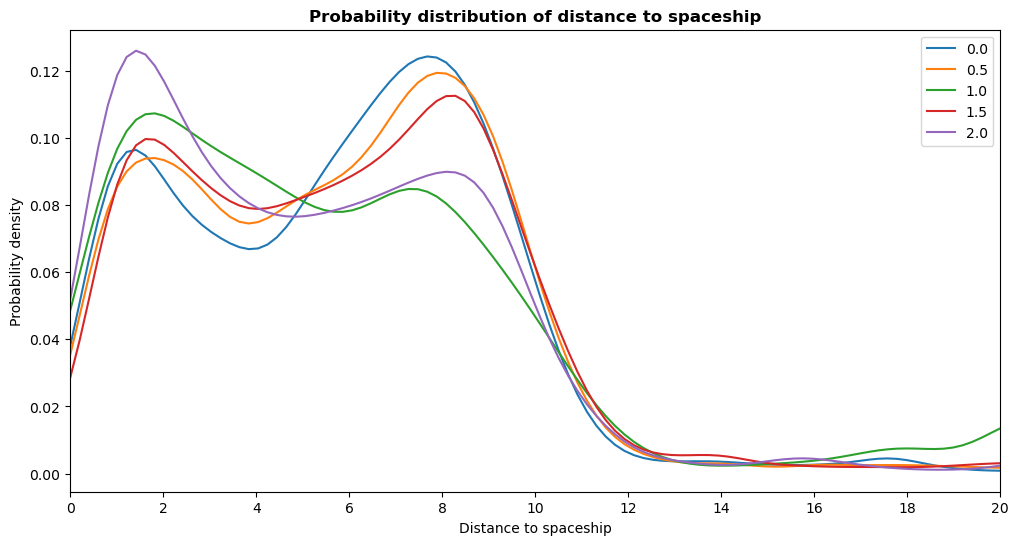

In [36]:
# Grid
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title(f"Probability distribution of distance to spaceship", fontdict={"fontweight": "bold"})


# axis labels
ax.set_xlabel("Distance to spaceship")
ax.set_ylabel("Probability density")

# plot boundaries:
lbound = 0
ubound = 20

ax.set_xlim([lbound, ubound])

xaxis = np.linspace(lbound, ubound, 11)
ax.set_xticks(xaxis)

for input_noise_intensity in np.unique(fix_data.input_noise):
    
    tmp_data = fix_data[fix_data["input_noise"] == input_noise_intensity]

    distances = [x for x in tmp_data.distance_to_spaceship if x == x]
    fix_data_array = np.asarray(distances)
    
    # compute hpdi (I went for the smallest interval which contains 25% of the mass)
    fix_data_hpdi_bounds = az.hdi(fix_data_array, 0.25)
    
    # instatiate KDEs
    kde_init = np.linspace(lbound, ubound, 100)
    
    fix_data_kde = st.gaussian_kde(fix_data_array)

    # draw KDE
    ax.plot(kde_init, fix_data_kde(kde_init), label=input_noise_intensity)

ax.legend()

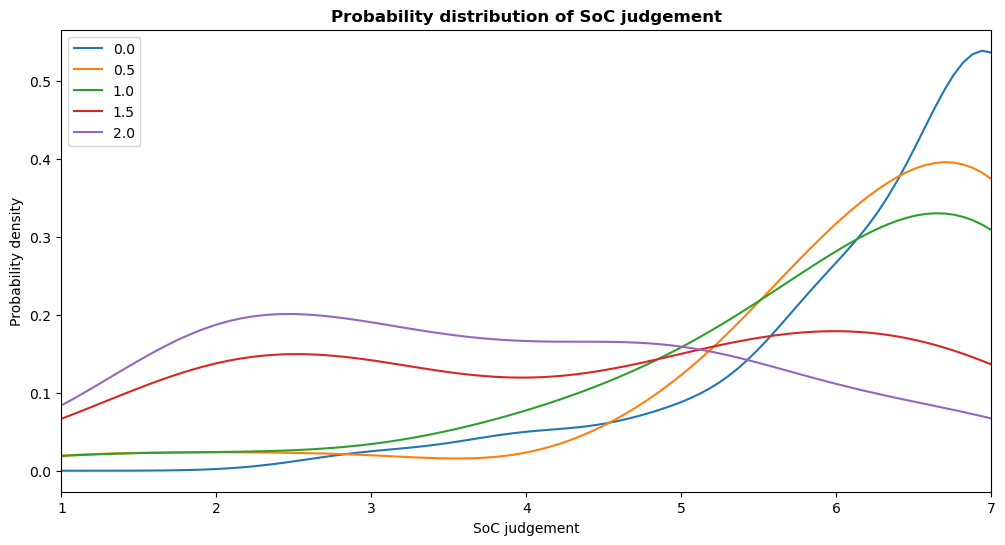

In [64]:
# Grid
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title(f"Probability distribution of SoC judgement", fontdict={"fontweight": "bold"})


# axis labels
ax.set_xlabel("SoC judgement")
ax.set_ylabel("Probability density")

# plot boundaries:
lbound = 1
ubound = 7

ax.set_xlim([lbound, ubound])

xaxis = np.linspace(lbound, ubound, 7)
ax.set_xticks(xaxis)

for input_noise_intensity in np.unique(soc_df_.input_noise):
    
    tmp_data = soc_df_[soc_df_["input_noise"] == input_noise_intensity]

    judgements = [x for x in tmp_data['SoC'] if x == x]
    soc_data_array = np.asarray(judgements)
    
    # compute hpdi (I went for the smallest interval which contains 25% of the mass)
    soc_data_hpdi_bounds = az.hdi(soc_data_array, 0.25)
    
    # instatiate KDEs
    kde_init = np.linspace(lbound, ubound, 100)
    
    soc_data_kde = st.gaussian_kde(soc_data_array)

    # draw KDE
    ax.plot(kde_init, soc_data_kde(kde_init), label=input_noise_intensity)

ax.legend()